<a href="https://colab.research.google.com/github/StefanoBergia/Tensorflow/blob/main/Stock_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [18]:
from tensorflow.keras.layers import Input,Dense,SimpleRNN,GRU,LSTM,Dense,Flatten,GlobalMaxPool1D
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/853be19fd33921867f63ec6e26e0cc171bd558c6/tf2.0/sbux.csv')

In [12]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [13]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [14]:
#wrong trying to predict the price itself
series=df['close'].values.reshape(-1,1)

In [20]:
scaler=StandardScaler()
scaler.fit(series[:len(series)//2])
series=scaler.transform(series).flatten()

In [21]:
T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)
N=len(X)
print("X.shape",X.shape,"Y.shape",Y.shape)

X.shape (1249, 10, 1) Y.shape (1249,)


In [22]:
i=Input(shape=(T,1))
x=LSTM(5)(i)
x=Dense(1)(x)

model=Model(i,x)
model.compile(loss='mse',
              optimizer=Adam(lr=0.1))

r=model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:])
)


Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 9s 48ms/step - loss: 0.1591 - val_loss: 0.1475
Epoch 2/80
20/20 [==============================] - 0s 11ms/step - loss: 0.0146 - val_loss: 0.0157
Epoch 3/80
20/20 [==============================] - 0s 11ms/step - loss: 0.0070 - val_loss: 0.0303
Epoch 4/80
20/20 [==============================] - 0s 10ms/step - loss: 0.0068 - val_loss: 0.0257
Epoch 5/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0057 - val_loss: 0.0264
Epoch 6/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0062 - val_loss: 0.0297
Epoch 7/80
20/20 [==============================] - 0s 10ms/step - loss: 0.0060 - val_loss: 0.0458
Epoch 8/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0071 - val_loss: 0.0338
Epoch 9/80
20/20 [==============================] - 0s 15ms/step - loss: 0.0082 - val_loss: 0.0387
Epoch 10/80
20/20 [==============================] - 0s 11ms/step - loss: 0.0055 - val_loss: 0.0423
Epoch 11/80
20/20 [====

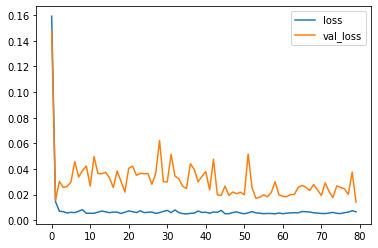

In [23]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

(1249, 1)


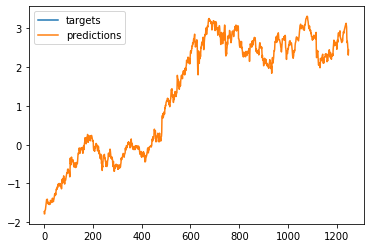

In [25]:
#One step forecast using true targets
outputs=model.predict(X)
print(outputs.shape)
predictions=outputs[:,0]

plt.plot(y,label='targets')
plt.plot(predictions,label='predictions')
plt.legend()
plt.show()

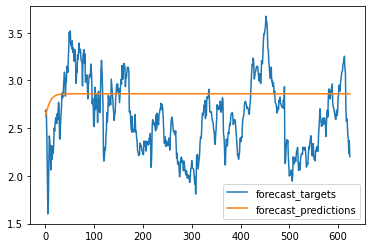

In [26]:
#Multi-step forecast

validation_target=Y[-N//2:]
validation_predictions=[]

last_x=X[-N//2]

while(len(validation_predictions)<len(validation_target)):
  p=model.predict(last_x.reshape(1,T,1))[0,0]
  validation_predictions.append(p)

  last_x=np.roll(last_x,-1)
  last_x[-1]=p

plt.plot(validation_target,label='forecast_targets')
plt.plot(validation_predictions,label='forecast_predictions')
plt.legend()
plt.show()
                                         

In [27]:
#correct method, predict stock return!
df['PrevClose']=df['close'].shift(1)#mode everything up 1

#so now it's like
#close /prev close
#x[2] x[1]
#x[3] x[2]
#x[4] x[3]

In [28]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [30]:
df['Return']= (df['close']-df['PrevClose'])/df['PrevClose']

In [31]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


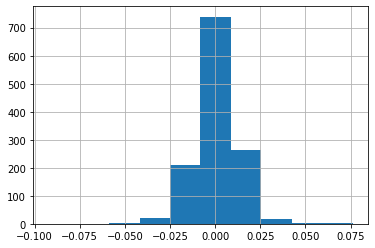

In [32]:
df['Return'].hist()

In [34]:
series=df['Return'].values[1:].reshape(-1,1)

scaler=StandardScaler()
scaler.fit(series[:len(series)//2])
series=scaler.transform(series).flatten()

In [35]:
T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)
N=len(X)
print("X.shape",X.shape,"Y.shape",Y.shape)

X.shape (1248, 10, 1) Y.shape (1248,)


In [36]:
i=Input(shape=(T,1))
x=LSTM(5)(i)
x=Dense(1)(x)

model=Model(i,x)
model.compile(loss='mse',
              optimizer=Adam(lr=0.1))

r=model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:])
)

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 2s 26ms/step - loss: 1.0046 - val_loss: 1.1273
Epoch 2/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9988 - val_loss: 1.1374
Epoch 3/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9882 - val_loss: 1.1521
Epoch 4/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9854 - val_loss: 1.1645
Epoch 5/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9897 - val_loss: 1.3044
Epoch 6/80
20/20 [==============================] - 0s 7ms/step - loss: 1.0275 - val_loss: 1.1359
Epoch 7/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9880 - val_loss: 1.1689
Epoch 8/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9988 - val_loss: 1.1601
Epoch 9/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9892 - val_loss: 1.1734
Epoch 10/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9863 - val_loss: 1.2513
Epoch 11/80
20/20 [==========

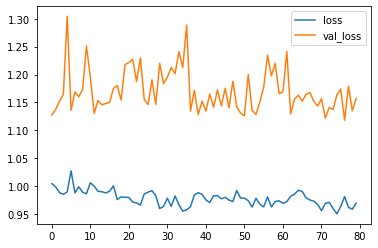

In [37]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

(1248, 1)


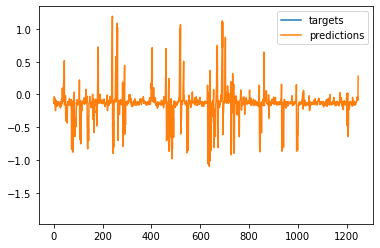

In [38]:
#One step forecast using true targets
outputs=model.predict(X)
print(outputs.shape)
predictions=outputs[:,0]

plt.plot(y,label='targets')
plt.plot(predictions,label='predictions')
plt.legend()
plt.show()

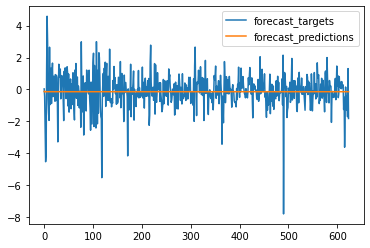

In [39]:
#Multi-step forecast

validation_target=Y[-N//2:]
validation_predictions=[]

last_x=X[-N//2]

while(len(validation_predictions)<len(validation_target)):
  p=model.predict(last_x.reshape(1,T,1))[0,0]
  validation_predictions.append(p)

  last_x=np.roll(last_x,-1)
  last_x[-1]=p

plt.plot(validation_target,label='forecast_targets')
plt.plot(validation_predictions,label='forecast_predictions')
plt.legend()
plt.show()

GOOD MODEL, USE BINARY CLASSIFICATION FOR PRICE UP/DOWN

In [41]:
input_data=df[['open','high','low','close','volume']].values
targets=df['Return'].values

In [42]:
T=10
D=input_data.shape[1]
N=len(input_data)-T

In [43]:
Ntrain=len(input_data)*2//3
scaler=StandardScaler()
scaler.fit(input_data[:Ntrain+T])
input_data=scaler.transform(input_data)

In [46]:
X_train=np.zeros((Ntrain,T,D))
Y_train=np.zeros(Ntrain)
for t in range(Ntrain):
  X_train[t,:,:]=input_data[t:t+T]
  Y_train[t]=targets[t+T]>0

In [47]:
X_test=np.zeros((N-Ntrain,T,D))
Y_test=np.zeros(N-Ntrain)

for u in range(N-Ntrain):
  t=u+Ntrain
  X_test[u,:,:]=input_data[t:t+T]
  Y_test[u]=(targets[t+T]>0)

In [48]:
i=Input(shape=(T,D))
x=LSTM(50)(i)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [51]:
r=model.fit(X_train,Y_train,
            batch_size=32,
            epochs=300,
            validation_data=(X_test,Y_test))

Epoch 1/300
27/27 [==============================] - 5s 53ms/step - loss: 0.6966 - accuracy: 0.5113 - val_loss: 0.6966 - val_accuracy: 0.4707
Epoch 2/300
27/27 [==============================] - 0s 10ms/step - loss: 0.6935 - accuracy: 0.5197 - val_loss: 0.6959 - val_accuracy: 0.4805
Epoch 3/300
27/27 [==============================] - 0s 9ms/step - loss: 0.6925 - accuracy: 0.5375 - val_loss: 0.6945 - val_accuracy: 0.4951
Epoch 4/300
27/27 [==============================] - 0s 10ms/step - loss: 0.6900 - accuracy: 0.5352 - val_loss: 0.6947 - val_accuracy: 0.4951
Epoch 5/300
27/27 [==============================] - 0s 10ms/step - loss: 0.6927 - accuracy: 0.5101 - val_loss: 0.6975 - val_accuracy: 0.4902
Epoch 6/300
27/27 [==============================] - 0s 9ms/step - loss: 0.6922 - accuracy: 0.5256 - val_loss: 0.6968 - val_accuracy: 0.4902
Epoch 7/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6902 - accuracy: 0.5221 - val_loss: 0.6926 - val_accuracy: 0.5073
Epoch 8/3

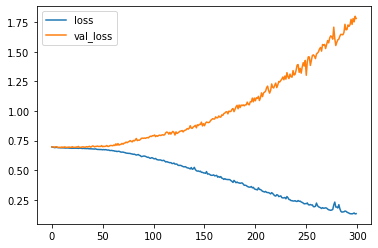

In [52]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

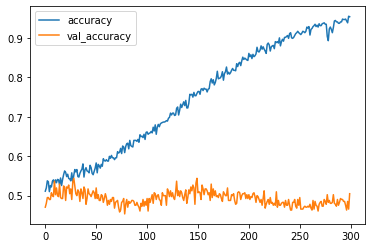

In [53]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()